In [4]:
import os

import mmcv
from tools.test import update_legacy_cfg

from mmseg.apis import inference_segmentor, init_segmentor
from mmseg.datasets import result_to_inst

config = "configs/config.py"  # 这个是配置文件，一般不用改
checkpoint = "final_model_tissuenet/iter_52500.pth"  # 权重路径，一共有两个，
                                           # final_model/iter_56000.pth
                                           # 和
                                           # final_model_tissuenet/iter_52500.pth
img = r"D:\DAFormer\data\dsb2018\images\test\test_0014.png"  # 要预测的图片路径
device = "cuda"  # 显卡就是"cuda"，cpu就是"cpu"
# build the model from a config file and a checkpoint file
cfg = mmcv.Config.fromfile(config)
cfg = update_legacy_cfg(cfg)
model = init_segmentor(
    cfg,
    checkpoint,
    device=device,
    revise_checkpoint=[(r'^module\.', ''), ('model.', '')])
# test a single image
result = inference_segmentor(model, img)
pred = result_to_inst(result[0])[0]  # 这个是最后的结果

load checkpoint from local path: final_model_tissuenet/iter_52500.pth


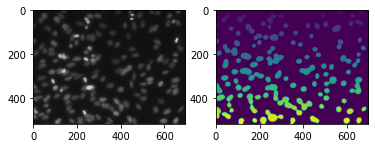

In [5]:
from matplotlib import pyplot as plt
import cv2
input_img = cv2.imread(img)
_,ax = plt.subplots(1, 2)
ax[0].imshow(input_img)
ax[1].imshow(pred)
plt.show()
